# ECUACIÓN DIFERENCIAL NO ORDINARIA

Resolver análiticamente la solución diferencial no ordinaria


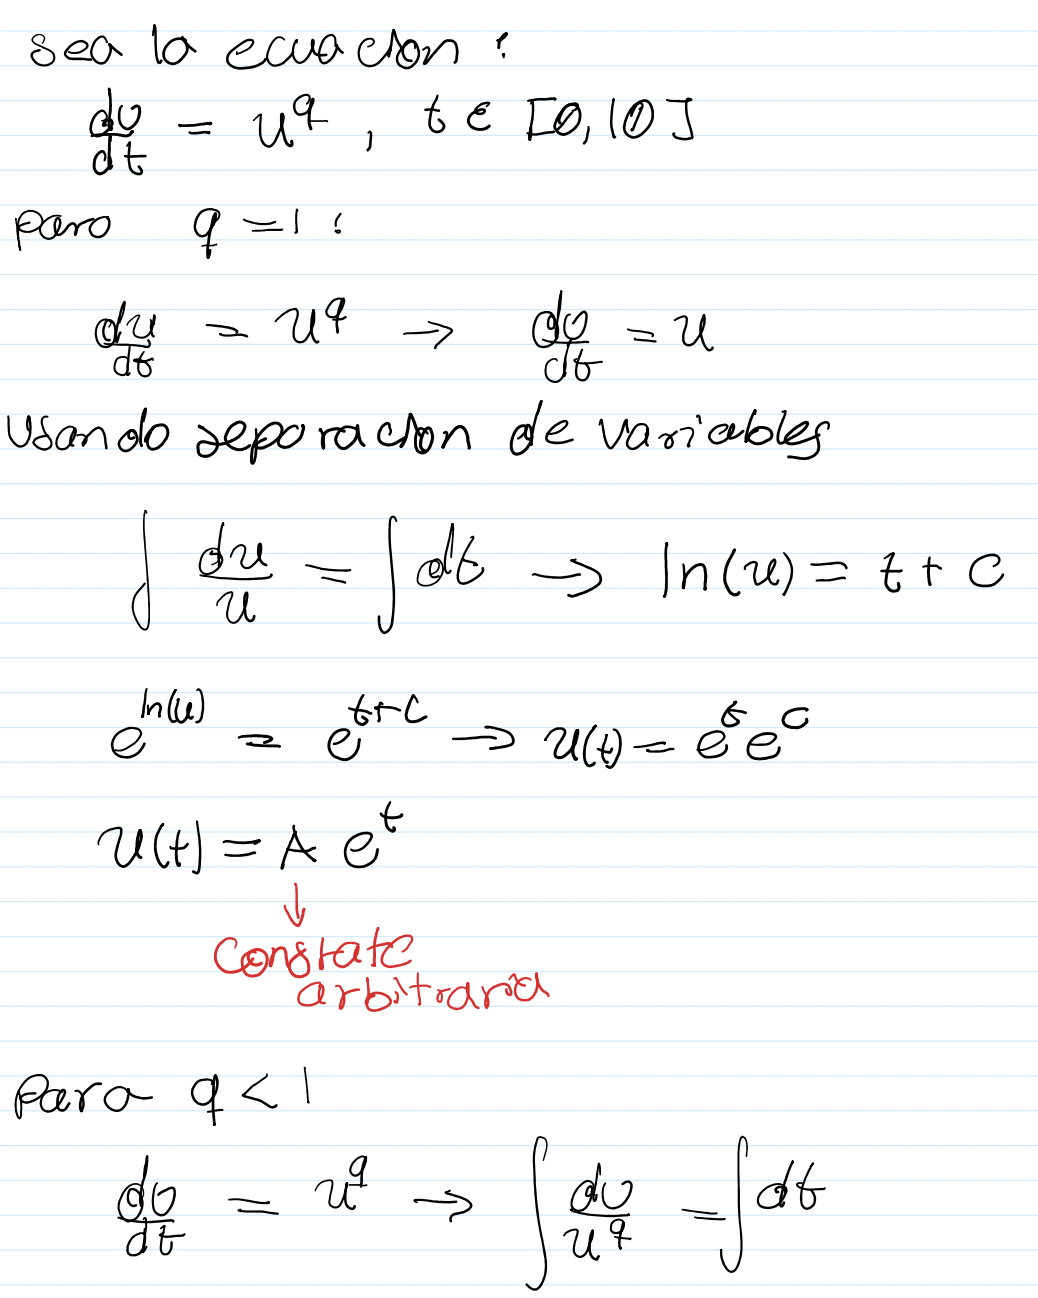


# 

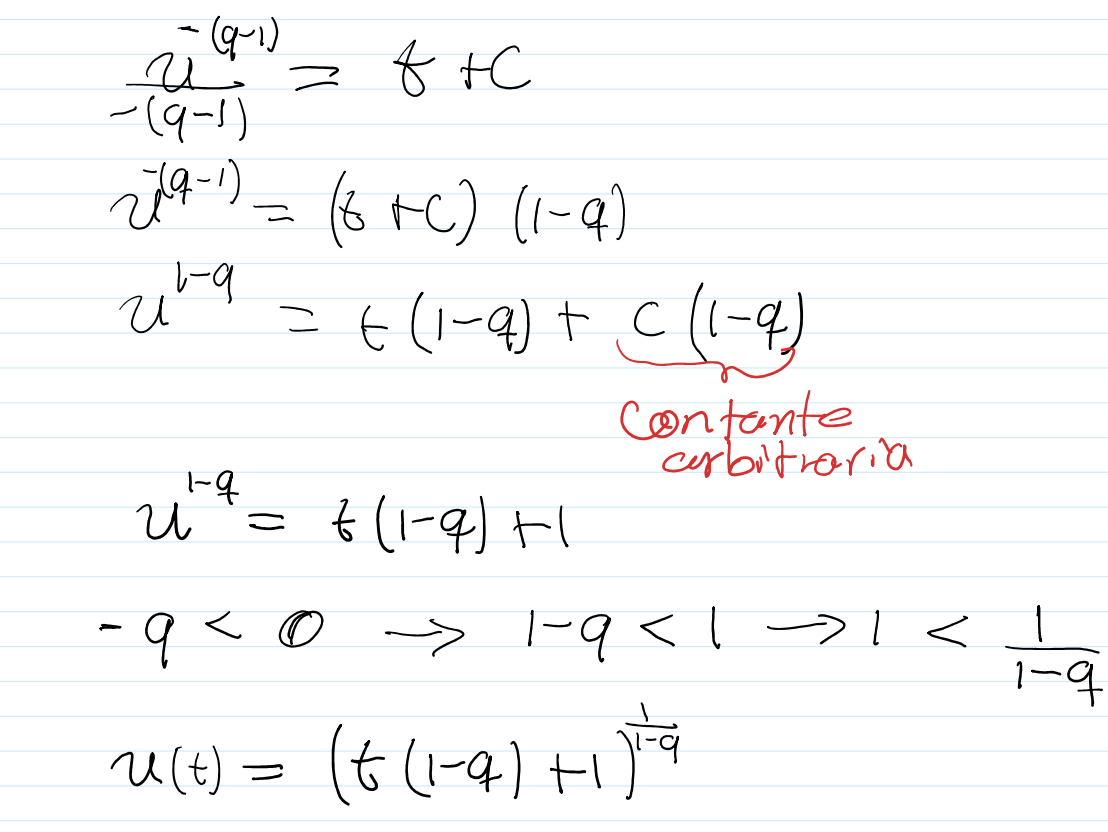

# METODOS MULTIPASOS

Encontrar los coeficientes para diferentes metodos de solución numerica multipaso

In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import sympy 
from fractions import Fraction

In [2]:
t = sympy.Symbol("t", Real = True)
u = sympy.Symbol("u", Real = True)


In [3]:
def coeficientes_AB(s):
    coeficientes_multipasos = np.zeros(s)
    for j in range((s)):
        primer_termino = ((-1)**j)/(np.math.factorial(j)*np.math.factorial(s-j-1))
        productoria = 1
        for i in range(s):
            if i != j:
                productoria = productoria*(u+i)
        integral = sympy.integrate(productoria, (u,0,1))
        coeficiente = primer_termino*integral
        coeficientes_multipasos[j] = (coeficiente)
    return coeficientes_multipasos 

In [4]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 3 puntos son: {coeficientes_AB(3)}")

Los coeficientes para el metodo de Adams-Brashford para 3 puntos son: [ 1.91666667 -1.33333333  0.41666667]


In [5]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 4 pasos son:{coeficientes_AB(4)}")

Los coeficientes para el metodo de Adams-Brashford para 4 pasos son:[ 2.29166667 -2.45833333  1.54166667 -0.375     ]


In [6]:
def coeficientes_AM(s):
    coeficientes_multipasos = np.zeros(s+1)
    for j in range((s+1)):
        primer_termino = ((-1)**j)/(np.math.factorial(j)*np.math.factorial(s-j))
        productoria2 = 1
        for i in range(s+1):
            if i != j:
                productoria2 = productoria2*(u+(i-1))
        integral = sympy.integrate(productoria2, (u,0,1))
        coeficiente = primer_termino*integral
        coeficientes_multipasos[j] = (coeficiente)
    return coeficientes_multipasos 

In [7]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 3 puntos son en representacion decimal son:                       {coeficientes_AM(3)}")

Los coeficientes para el metodo de Adams-Brashford para 3 puntos son en representacion decimal son:                       [ 0.375       0.79166667 -0.20833333  0.04166667]


In [8]:
print(f"Los coeficientes para el metodo de Adams-Brashford para 4 puntos en representacion decimal son:                        {coeficientes_AM(4)}")

Los coeficientes para el metodo de Adams-Brashford para 4 puntos en representacion decimal son:                        [ 0.34861111  0.89722222 -0.36666667  0.14722222 -0.02638889]


# INTERACCIÓN N CUERPOS GRAVITACIONALES

#  Simplectic Integrator Yoshida

Vamos a solucionar las ecuaciones de cinematica para un pendulo mediante el método de integración simpléctica por Yoshida de cuarto grado. Posteriormente a esta solución vamos a comparar el rendimiento de conservación de energía entre el metodo de segundo grado con el de Yoshida de cuarto orden.

# 
Implementación del codigo del método de Yoshida

In [9]:
def dv(x):
    return -x

def Yoshida(tiempo_inicial, tiempo_final, h, condicion_x_inicial, condicion_v_inicial):
    N = int((tiempo_final - tiempo_inicial)/ h)
    time = np.linspace(tiempo_inicial, tiempo_final, N)
    
    X = np.zeros(len(time))
    V = np.zeros(len(time))
    
    X[0] = condicion_x_inicial
    V[0] = condicion_v_inicial
    
    W_0 = -(np.cbrt(2))/(2- np.cbrt(3))
    W_1 = (1)/(2-np.cbrt(2))
    
    C = [W_1/2, (W_0+W_1)/2, (W_0+W_1)/2, W_1/2 ]
    D = [W_1, W_0, W_1]
    for i in range(1,len(time)):
        delta = time[i]-time[i-1]
        x_1 = X[i-1] + C[0]*V[i-1]*delta
        v_1 = V[i-1] + D[0]*dv(x_1)*delta
        
        x_2 = x_1 + C[1]*v_1*delta
        v_2 = v_1 + D[1]*dv(x_2)*delta
        
        x_3 = x_2 + C[2]*v_2*delta
        v_3 = v_2 + D[2]*dv(x_3)*delta

        x_4 = x_3 + C[3]*v_3*delta
        v_4 = v_3
        
        X[i] = x_4
        V[i] = v_4
    
    return X, V, time

In [10]:
a = Yoshida(0,10, 0.0001, 1, 0)
X = a[0]
V = a[1]
time = a[2]

In [11]:
Energia_potencial_elastica = []
for i in X:
    Energia_potencial_elastica.append((1/2)*i**2)
    
Energia_cinetica = []
for i in V:
    Energia_cinetica.append((1/2)*i**2)
    
Energia_mecanica = []
for i in range(len(Energia_cinetica)):
    Energia_mecanica.append(Energia_potencial_elastica[i]+Energia_cinetica[i])

# 
Implementación del codigo del método de solución de LeapFrog

In [12]:
tiempo_inicial = 0
tiempo_final = 10
N = 201
time_leapfrog = np.linspace(tiempo_inicial, tiempo_final, N)

condiciones_iniciales = np.array([1.0,0])

In [13]:
def dv(x):
    return -x

In [14]:
def LeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*dv(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*dv(x[i-1])
        x[i] = x[i-1] + h*v[i]
        
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    return X,V

In [15]:
x, v = LeapFrog(condiciones_iniciales,time_leapfrog)

Energia_potencial_leapfrog = []
for i in x:
    Energia_potencial_leapfrog.append((1/2)*i**2)
    
Energia_cinetica_leapfrog = []
for i in v:
    Energia_cinetica_leapfrog.append((1/2)*i**2)
    
Energia_mecanica_leapfrog = []
for i in range(len(Energia_potencial_leapfrog)):
    Energia_mecanica_leapfrog.append(Energia_potencial_leapfrog[i]+Energia_cinetica_leapfrog[i])
    

# 
Gráfica generada para hacer la comparación entre los dos métodos

<IPython.core.display.Javascript object>


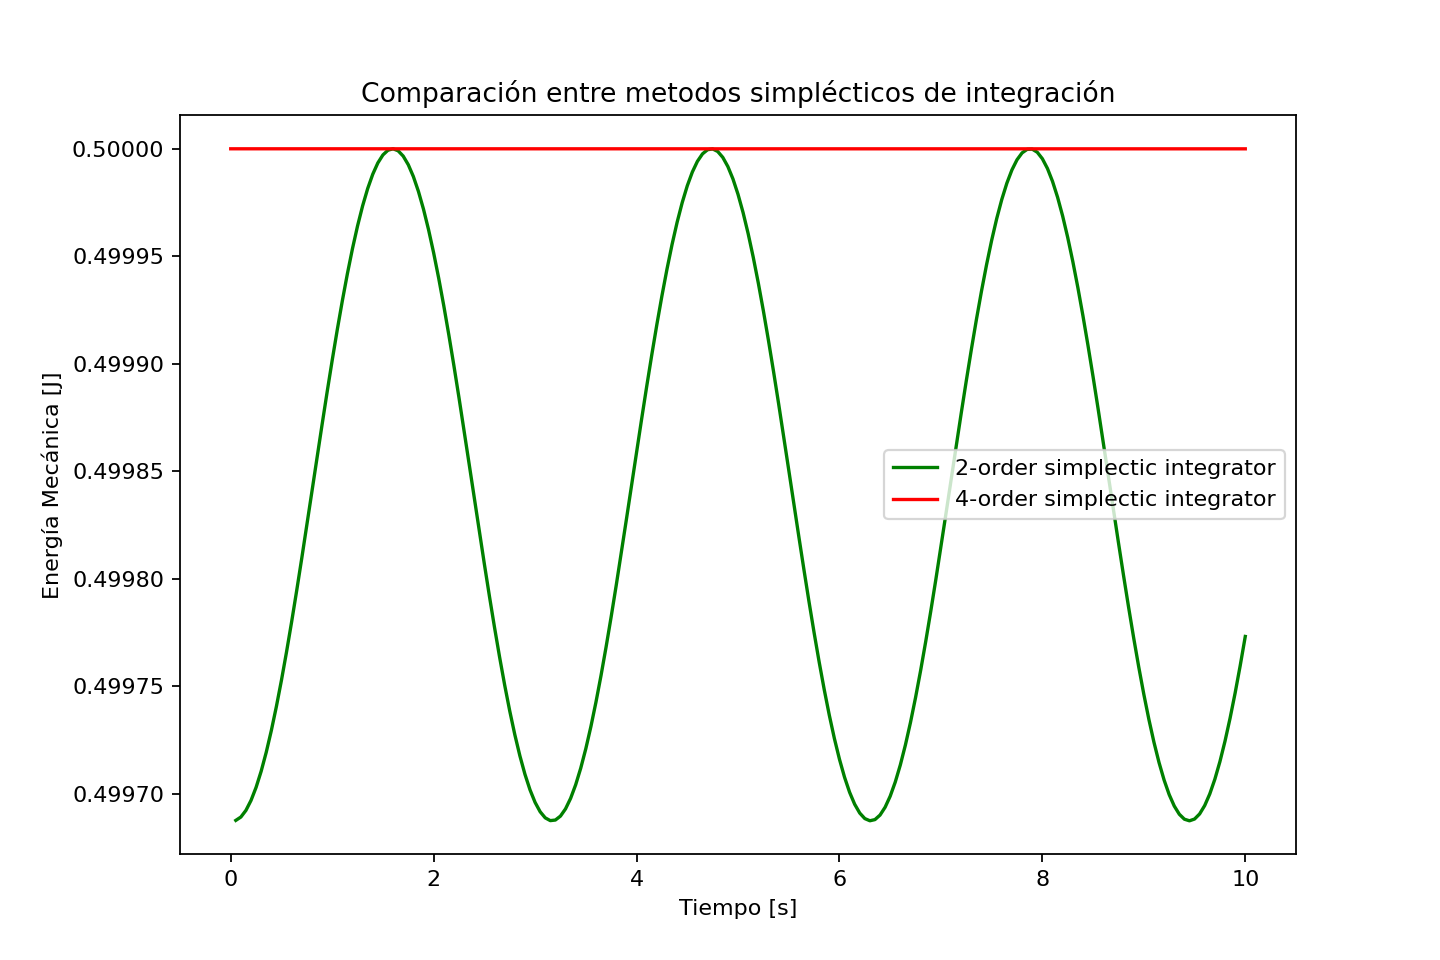

In [16]:
plt.figure(figsize = (9,6))
plt.title("Comparación entre metodos simplécticos de integración")
plt.xlabel("Tiempo [s]")
plt.ylabel("Energía Mecánica [J]")
plt.plot(time_leapfrog[1:], Energia_mecanica_leapfrog, label = '2-order simplectic integrator', color = "green")
plt.plot(time, Energia_mecanica, label = '4-order simplectic integrator', color = "red")
plt.legend()
plt.show()